In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advance_statistics.csv')
original_columns = df.columns
df.columns=np.arange(11)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
51,Male,Good,Often,Fair,Satisfied,Very comfortable,Agree,Effective,Satisfied,Definitely Yes,Satisfied
2,Female,Good,Always,Good,Dissatisfied,comfortable,Disagree,Effective,Satisfied,Definitely Yes,Satisfied
35,Male,Excellent,Always,Excellent,Satisfied,comfortable,Agree,Effective,Satisfied,Definitely Yes,Very Satisfied
12,Male,Excellent,Always,Excellent,Completely Satisfied,Very comfortable,Strongly Agree,Highly Effective,Very Satisfied,Definitely Yes,Very Satisfied
82,Male,Good,Sometimes,Good,Satisfied,comfortable,Agree,Moderately Effective,Satisfied,Probably Yes,Satisfied


In [3]:
col_names = ['Gender','Communication with team and Supervisors','Work Appreciation by Supervisors','Work-Life balance provided by the Company','Satisfication Level with opportunities for career growth','Comfortable feel sharing your ideas within organizations','company culture align with personal beliefs','Performance feedback helping you grow Professional','Satisfication with perks provided by company','Recommend company to work','Job Satisfication']
col_names

['Gender',
 'Communication with team and Supervisors',
 'Work Appreciation by Supervisors',
 'Work-Life balance provided by the Company',
 'Satisfication Level with opportunities for career growth',
 'Comfortable feel sharing your ideas within organizations',
 'company culture align with personal beliefs',
 'Performance feedback helping you grow Professional',
 'Satisfication with perks provided by company',
 'Recommend company to work',
 'Job Satisfication']

In [4]:
original_columns

Index(['What is your Gender ?',
       'How would you rate the communication within your team and with your supervisors?',
       'Do you feel that your work is appreciated and recognized by your supervisors?',
       'How would you rate the work-life balance provided by the company?',
       'Are you satisfied with the opportunities for career growth and development in the company?',
       'How comfortable do you feel in sharing your ideas and opinions within the organizations?',
       'Do you feel that the company culture and values align with your personal beliefs and work ethics?',
       'How effective do you find the performance feedback and review process in helping you grow professional?',
       'How satisfied are you with the benefits and perks provided by the company(E.G., Healthcare,Retirement Plans,Vacation Time,ETC)?',
       'Would you recommend the company as a good place to work to your friends or acquaintances? ',
       'How satisfied are you with your current job 

In [5]:
df[2].unique()
def catagorize(x):
    if x == 'Oftion':
        return 'Often'
    if x == 'Rarely':
        return 'Sometimes'
    return x
df[2] = df[2].apply(catagorize)
df[2].unique()

array(['Sometimes', 'Always', 'Often', 'Never'], dtype=object)

In [6]:
df[3].unique()
def catagorize(x):
    if x == 'Excellent;Very Poor':
        return 'Excellent'
    return x
df[3] = df[3].apply(catagorize)
df[3].unique()

array(['Poor', 'Good', 'Excellent', 'Fair', 'Very Poor'], dtype=object)

In [7]:
def catagorize(x):
    if x == 'Completely Satisfied' or x == 'Satisfied;Neutral':
        return 'Satisfied'
    if x == 'Completely Dissatisfied':
        return 'Dissatisfied'
    return x
        
df[4] = df[4].apply(catagorize)
df[4].unique()

array(['Neutral', 'Satisfied', 'Dissatisfied'], dtype=object)

In [8]:
df[5].unique()
def catagorize(x):
    if x == 'Very comfortable' or x == 'Satisfied;Neutral':
        return 'comfortable'
    if x == 'Very Uncomfortable':
        return 'Uncomfortable'
    return x
        
df[5] = df[5].apply(catagorize)
df[5].unique()

array(['Neutral', 'comfortable', 'Uncomfortable'], dtype=object)

In [9]:
df[9].unique()
#col_names[9]

array(['Not Sure', 'Probably Yes', 'Definitely Yes', 'Probably Not',
       'Definitely No'], dtype=object)

In [10]:
for col in df.columns:
    try:
        df[col] = df[col].str.split(';', expand=True)[0]  # Use expand=True to create new columns
    except:
        df[col] = df[col]


In [11]:
def catagorize(x):
    if x in ('Very Satisfied','Satisfied'):
        return 'Satisfied'
    if x== 'Neutral':
        return x
    else:
        return 'Dissatisfied'
        
df[10] = df[10].apply(catagorize)
df[10].nunique()

3

In [12]:
i=0
for c in df.columns:
    print(original_columns[i])
    i+=1
    print(df[c].unique())

What is your Gender ?
['Male' 'Female']
How would you rate the communication within your team and with your supervisors?
['Good' 'Excellent' 'Fair' 'Poor' 'Very Poor']
Do you feel that your work is appreciated and recognized by your supervisors?
['Sometimes' 'Always' 'Often' 'Never']
How would you rate the work-life balance provided by the company?
['Poor' 'Good' 'Excellent' 'Fair' 'Very Poor']
Are you satisfied with the opportunities for career growth and development in the company?
['Neutral' 'Satisfied' 'Dissatisfied']
How comfortable do you feel in sharing your ideas and opinions within the organizations?
['Neutral' 'comfortable' 'Uncomfortable']
Do you feel that the company culture and values align with your personal beliefs and work ethics?
['Disagree' 'Agree' 'Strongly Agree' 'Neutral' 'Strongly Disagree']
How effective do you find the performance feedback and review process in helping you grow professional?
['Effective' 'Highly Effective' 'Moderately Effective'
 'Highly Ineffec

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [21]:
sns.set_context('paper', font_scale = 2)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

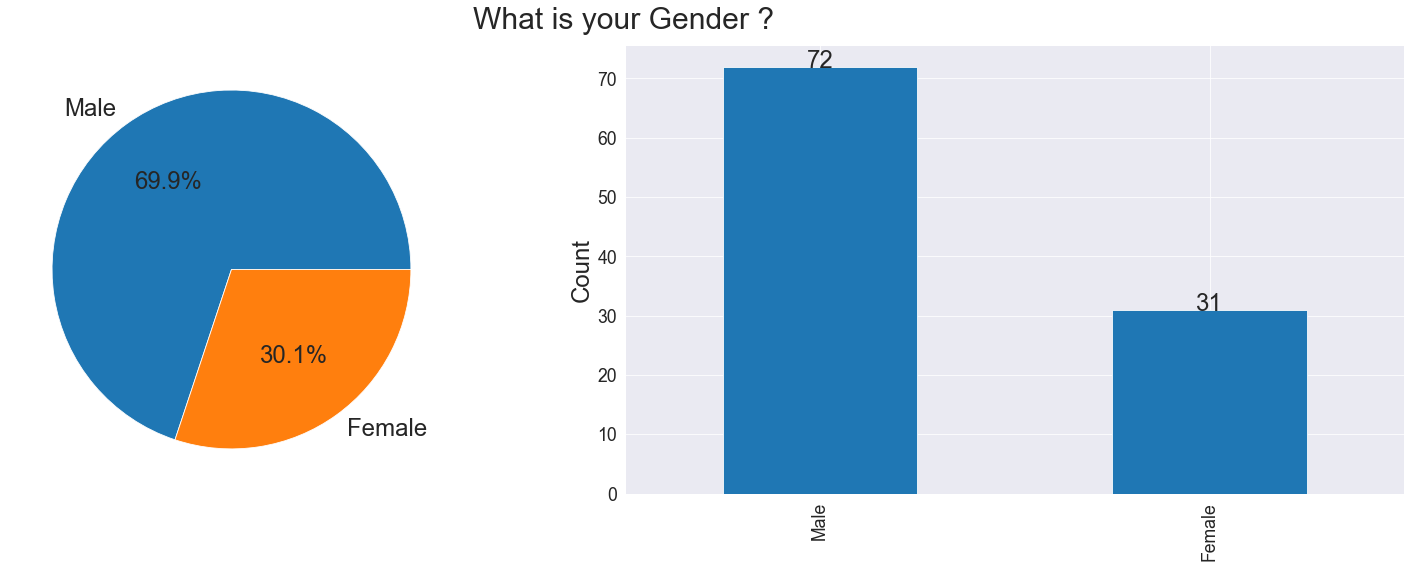

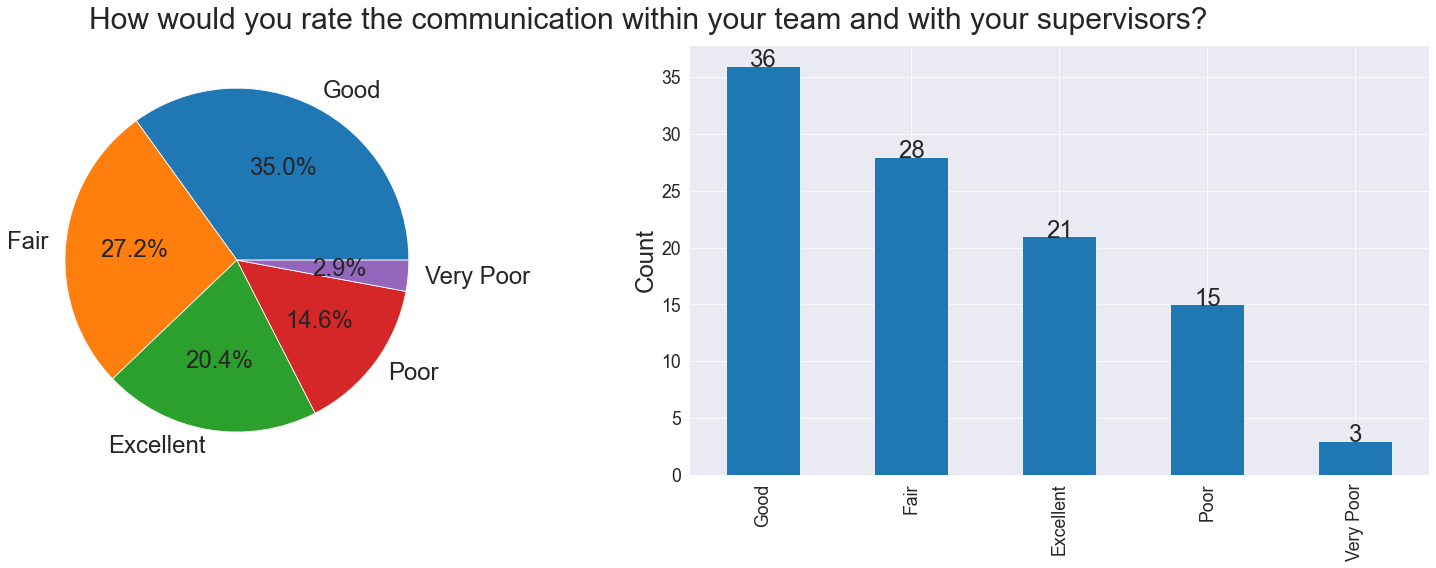

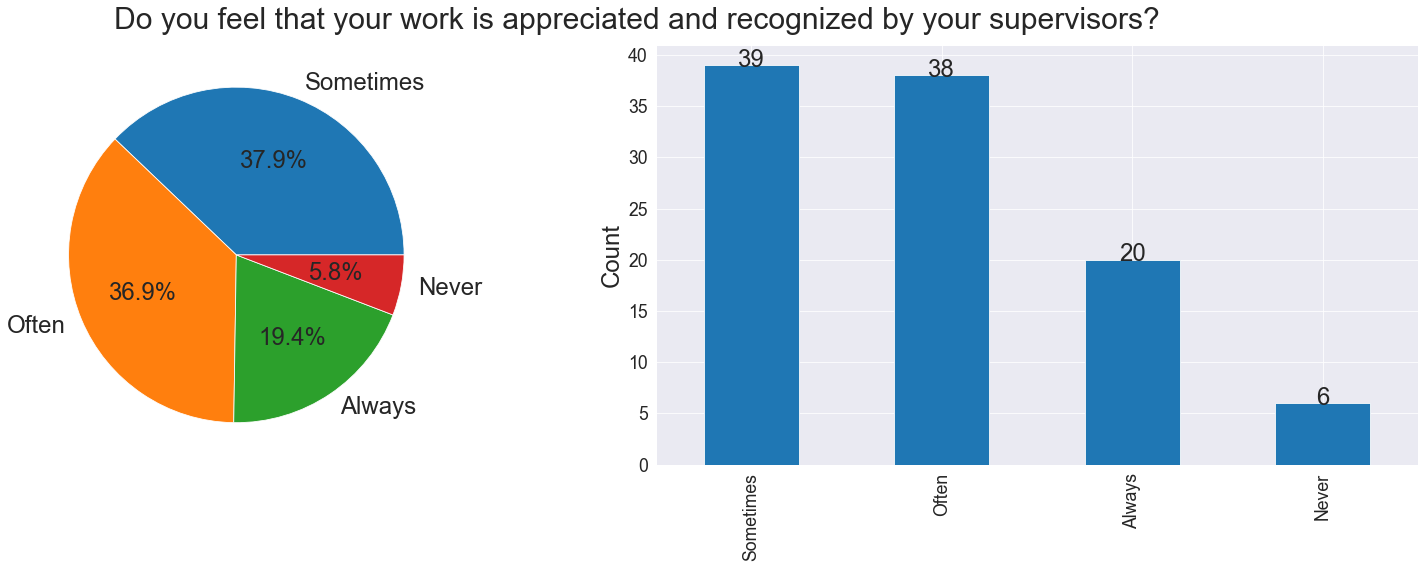

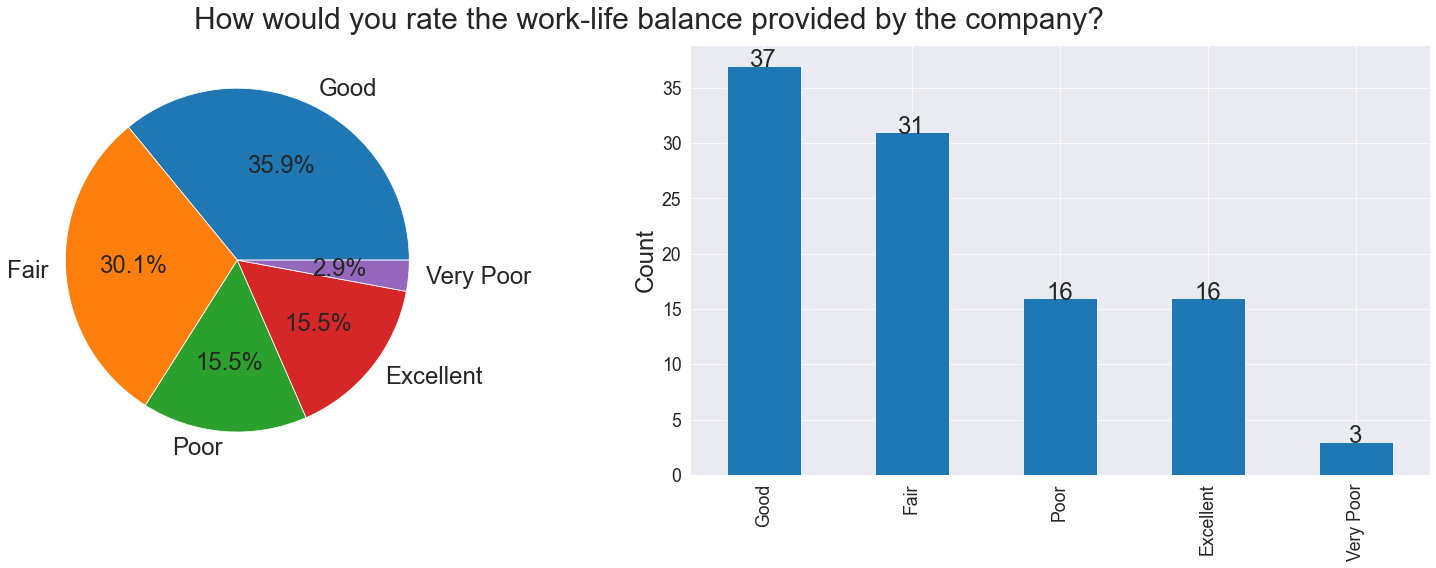

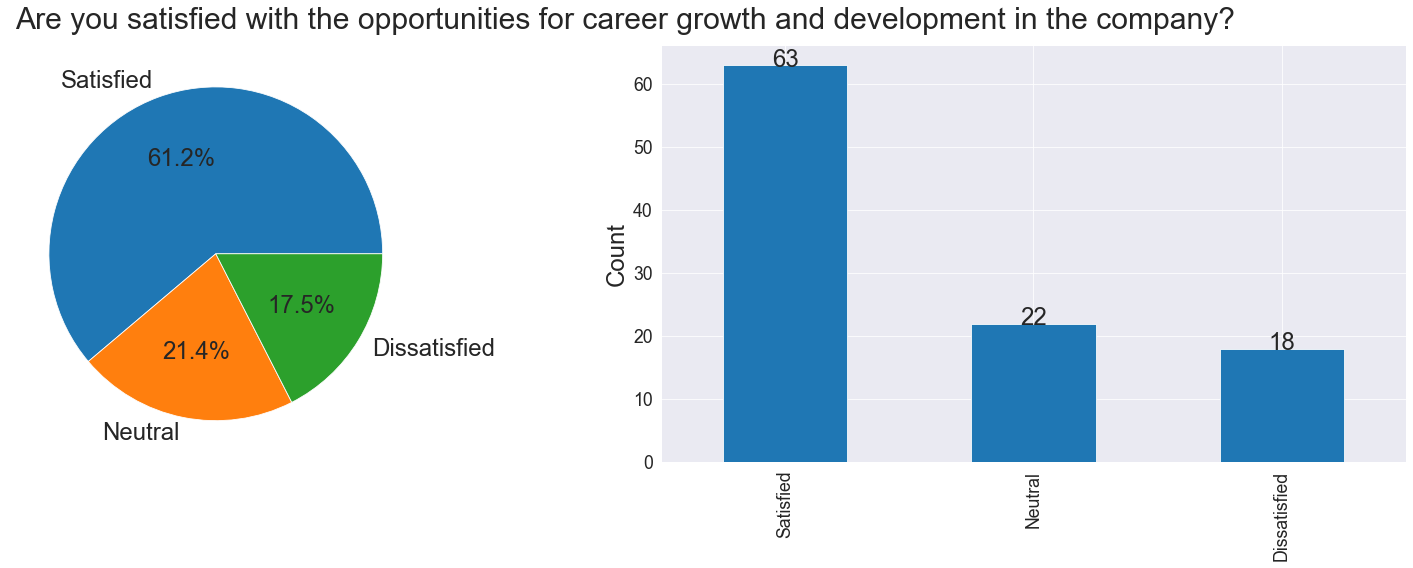

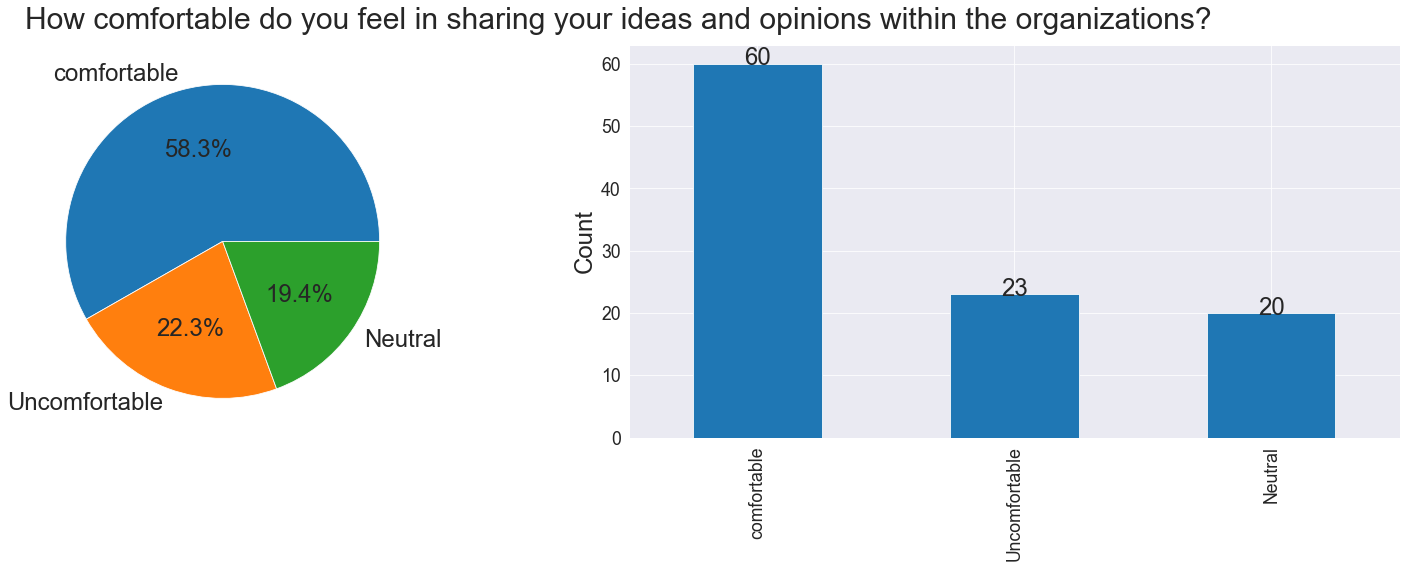

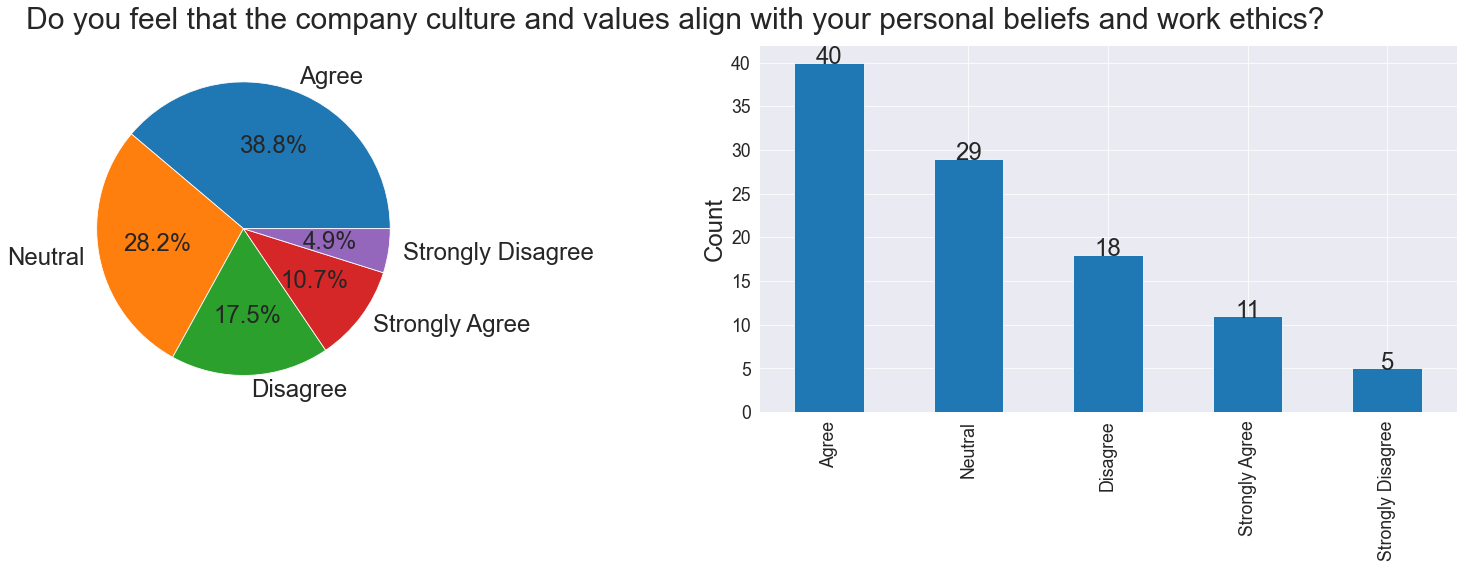

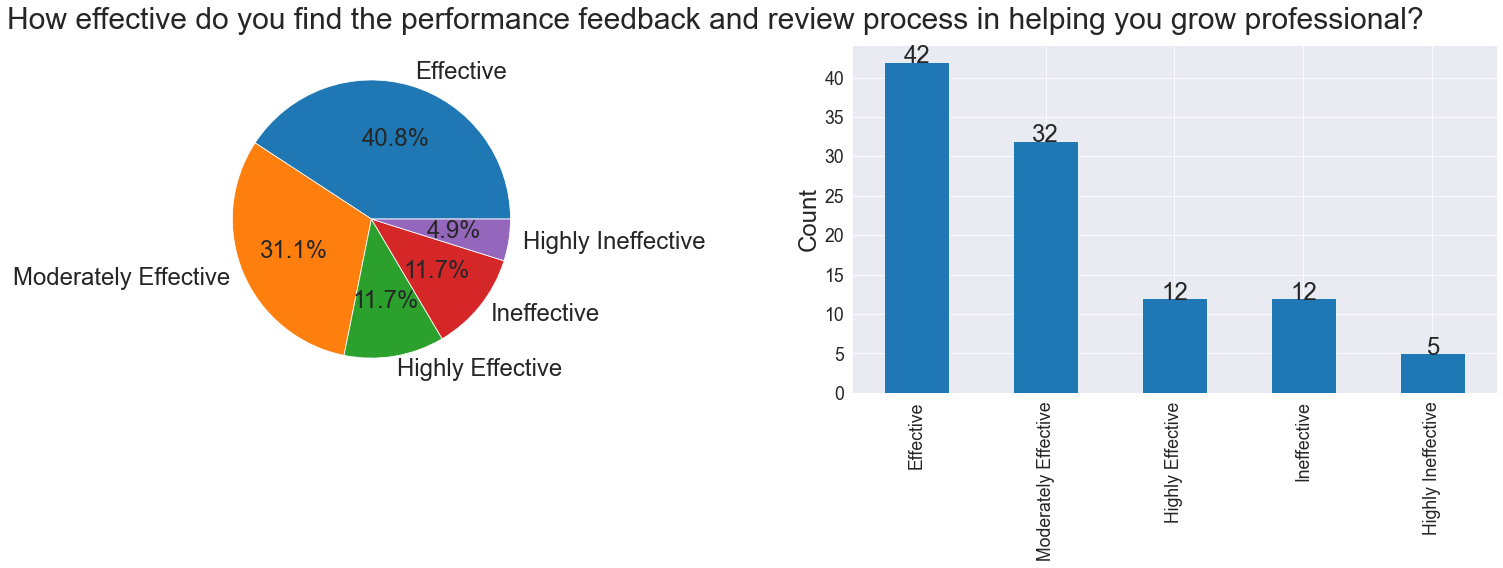

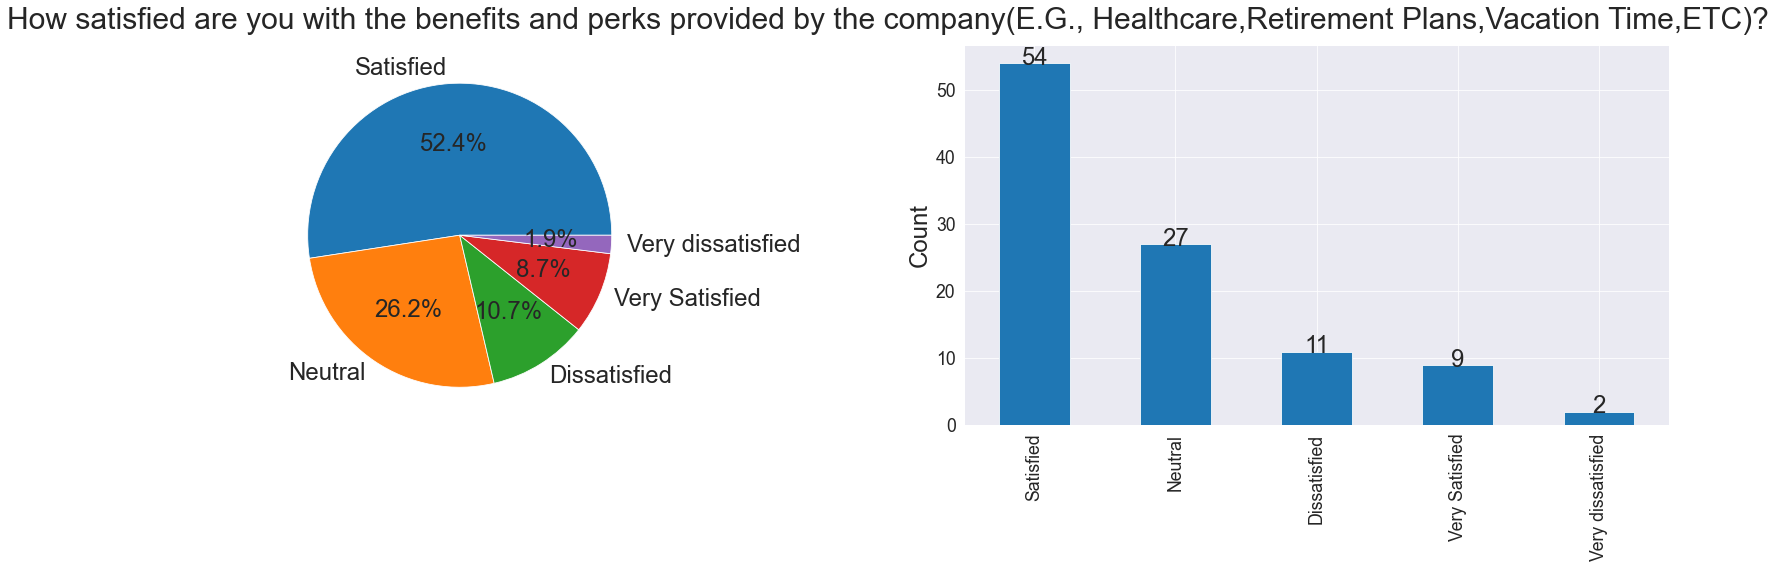

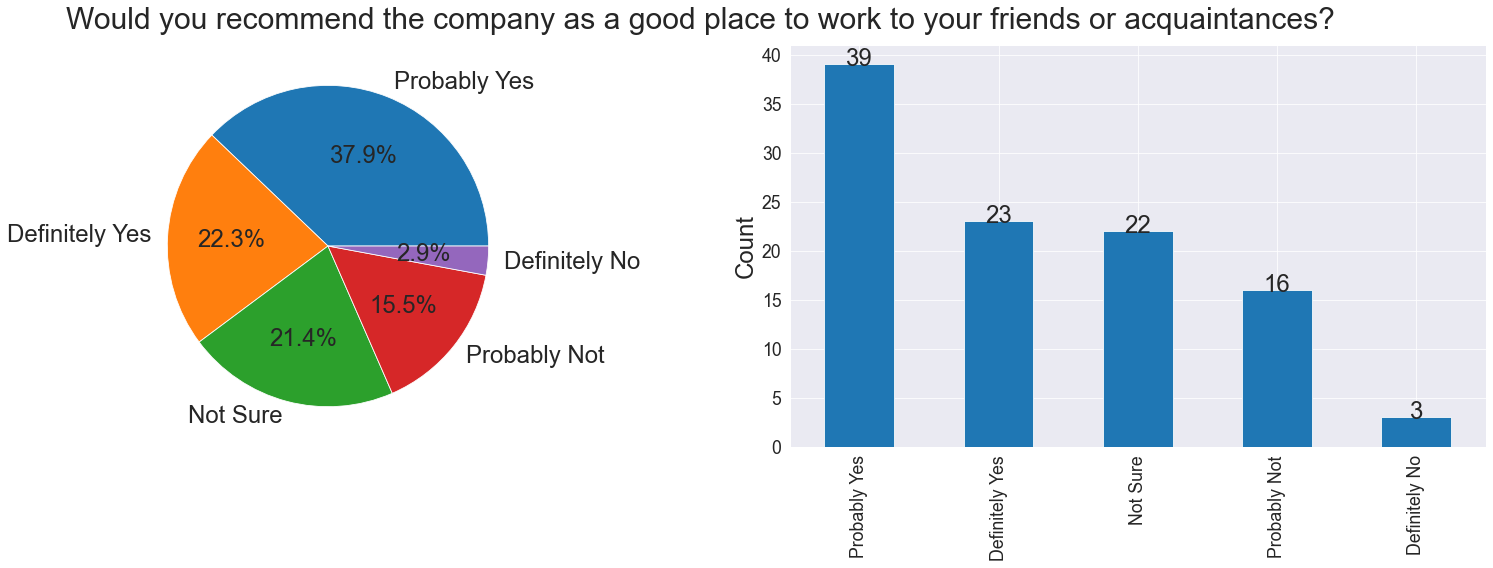

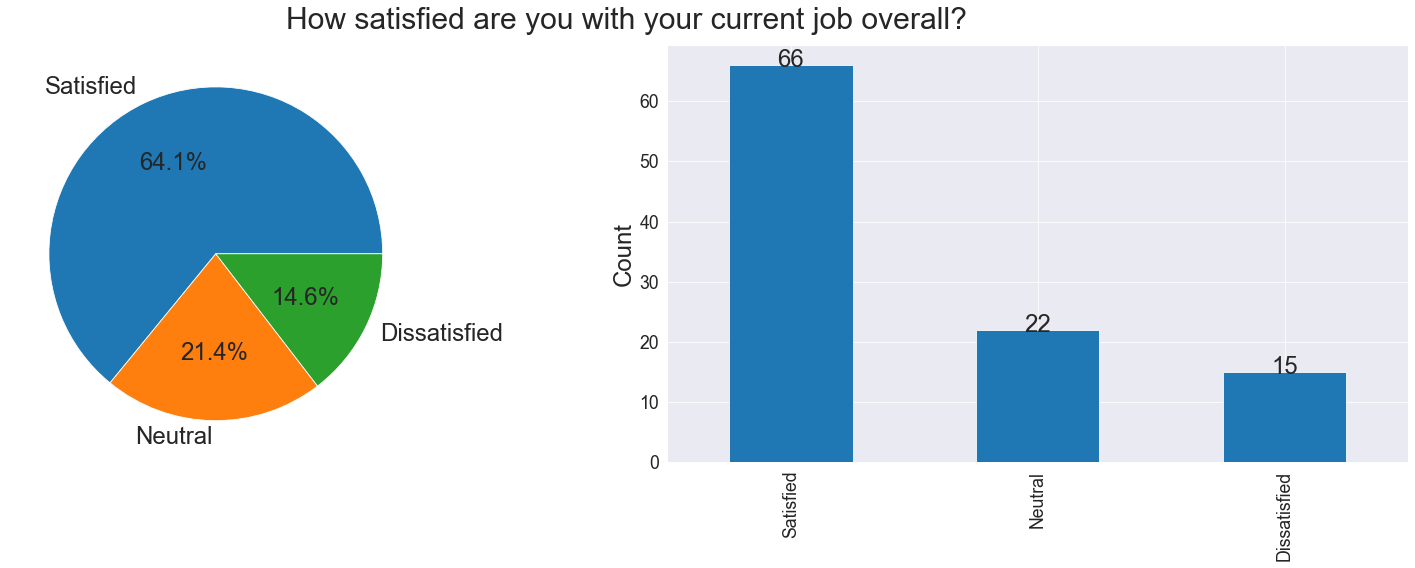

In [16]:
import os
import matplotlib.pyplot as plt

save_path = r'D:\4th Semester\Advanced Statistics\Project\Uni-Variate Data Analysis'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)
n= 1
i = 0
# Assuming df is your DataFrame
for column in df.columns:
    # Create a figure with two subplots (1 row, 2 columns)
    fig, axs = plt.subplots(1, 2, figsize=(22, 8))

    # Plot Pie Chart
    pie_ax = axs[0]
    #pie_ax.set_title('Pie Chart', fontsize=18)
    pie_chart = df[column].value_counts().plot(kind='pie', autopct='%0.1f%%', ax=pie_ax, textprops={'fontsize': 24})
    pie_chart.set_ylabel('')  # Remove the default 'count' label

    # Plot Bar Plot
    bar_ax = axs[1]
    #bar_ax.set_title('Bar Plot', fontsize=18)
    bar_chart = df[column].value_counts().plot(kind='bar', ax=bar_ax)
    bar_chart.set_xlabel('')  # Remove the default 'categories' label
    bar_chart.set_ylabel('Count', fontsize=24)  # Set the font size of the y-axis label

    # Increase the font size of bar plot labels
    for label in bar_chart.patches:
        bar_ax.annotate(
            str(label.get_height()), 
            (label.get_x() + label.get_width() / 2, label.get_height()),
            ha='center',
            va='center',
            fontsize=24,  # Adjust the font size as needed
            xytext=(0, 5),  # Adjust the vertical offset of the label
            textcoords='offset points'
        )

    # Set a single title for the entire figure
    fig.suptitle(original_columns[i], fontsize=30)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Save the figure to the specified path
    fig.savefig(os.path.join(save_path, f'{n} {col_names[i]}.png'))
    n+=1
    i += 1
    # Show the plots
    plt.show()


In [17]:
import matplotlib
matplotlib.use('Agg')

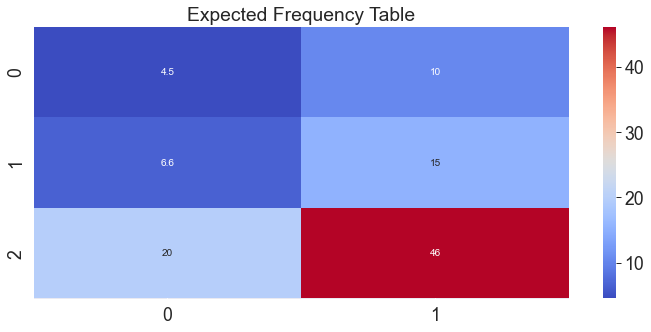

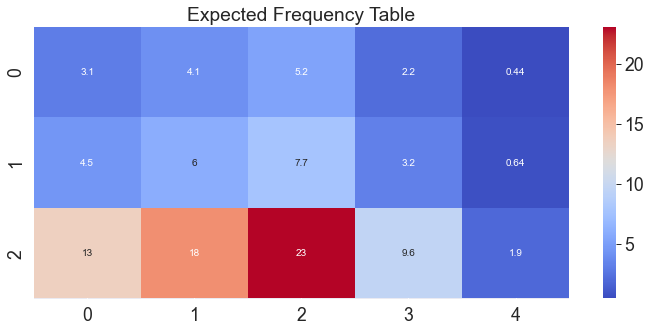

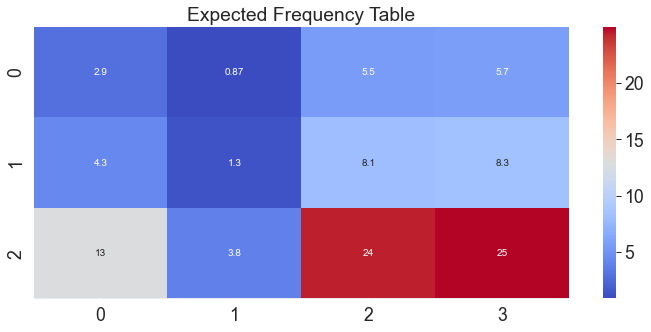

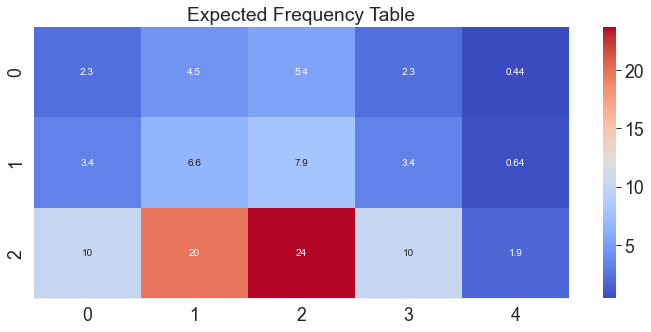

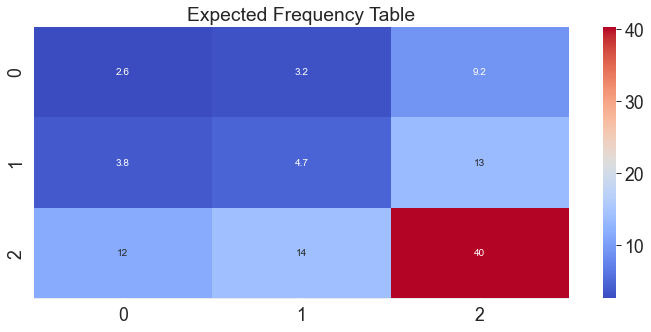

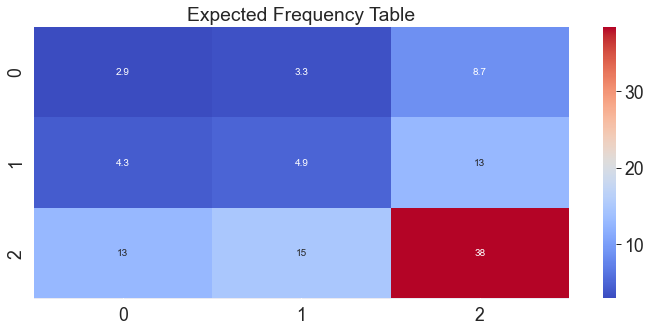

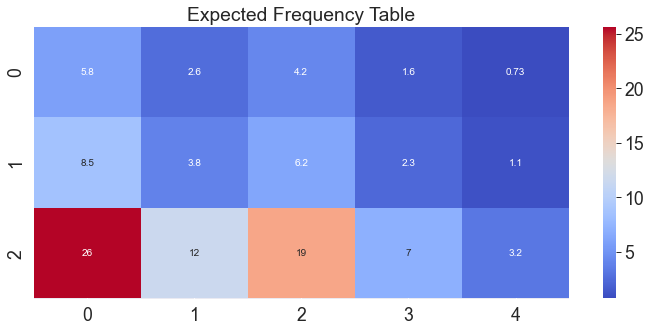

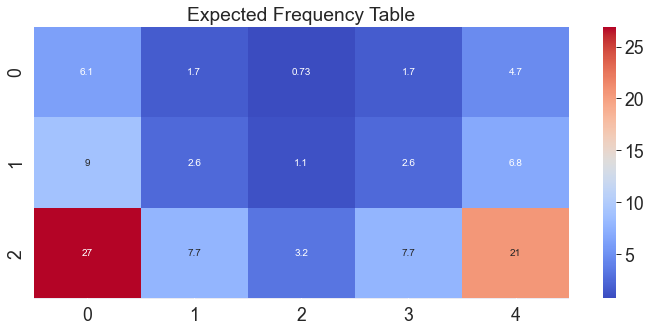

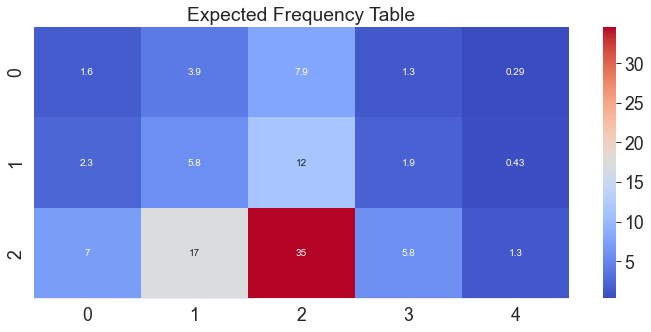

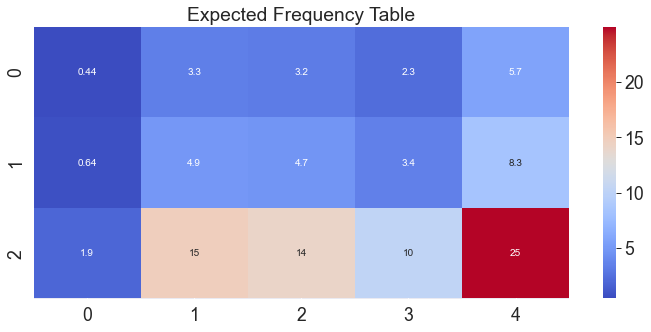

In [18]:
from scipy.stats import chi2_contingency
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

score = []
n = 1
save_path = r'D:\4th Semester\Advanced Statistics\Project\Expected Frequencu Tables'

# Create chi_2_df outside the loop


for i, feature in enumerate(df.columns[:-1]):
    chi_2_df = pd.DataFrame(columns=['Chi Square Statistics', 'P-Value', 'Degree of Freedom'])
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))
    
    # create contingency table
    ct = pd.crosstab(df[10], df[feature])
    
    # chi_test
    chi2_stats, p_value, dof, expected_frequency = chi2_contingency(ct)
    
    sns.heatmap(expected_frequency, annot=True, cmap='coolwarm', ax=ax1)
    ax1.set_title(f'Expected Frequency Table')
    
    # Update values in chi_2_df
    chi_2_df.loc[i, 'Chi Square Statistics'] = chi2_stats
    chi_2_df.loc[i, 'P-Value'] = p_value
    chi_2_df.loc[i, 'Degree of Freedom'] = dof
    
    # Convert relevant columns of chi_2_df to numeric
    chi_2_df['Chi Square Statistics'] = pd.to_numeric(chi_2_df['Chi Square Statistics'])
    chi_2_df['P-Value'] = pd.to_numeric(chi_2_df['P-Value'])
    chi_2_df['Degree of Freedom'] = pd.to_numeric(chi_2_df['Degree of Freedom'])
    
    #sns.heatmap(chi_2_df, annot=True, cmap='viridis', linewidth=.5, ax=ax2)
    #ax2.set_title(f'Chi Square Test Results')
    fig.savefig(os.path.join(save_path, f'{col_names[i]}.png'))
    
    n += 1
    score.append(p_value)


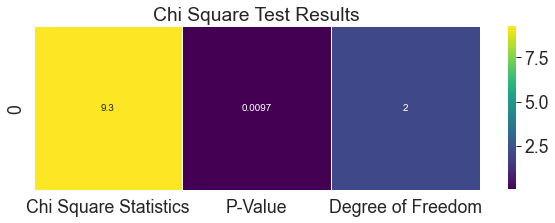

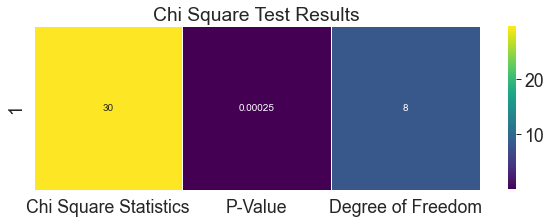

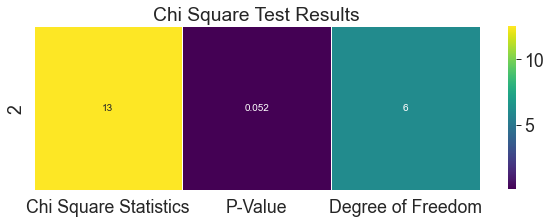

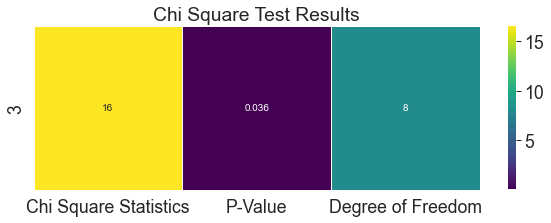

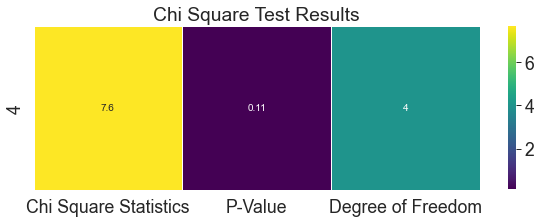

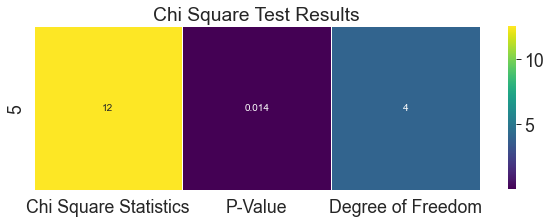

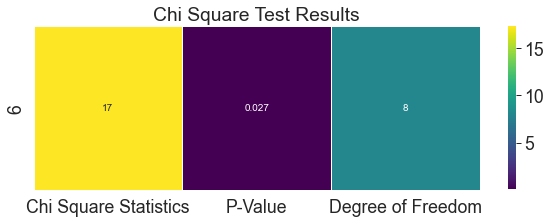

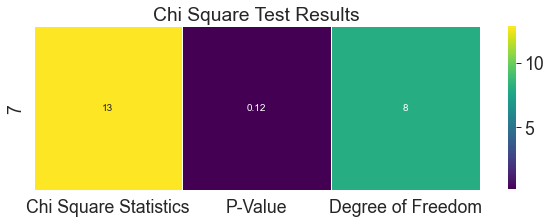

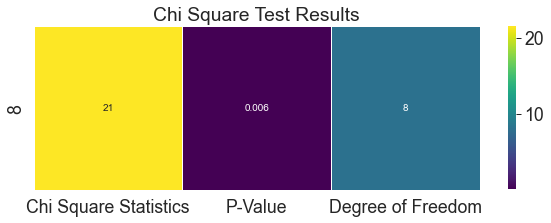

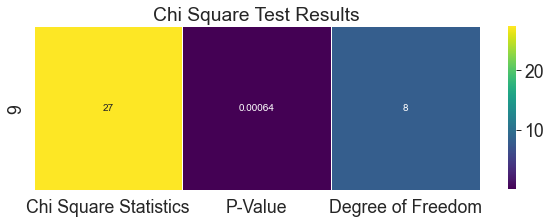

In [19]:
from scipy.stats import chi2_contingency
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

score = []
n = 1
save_path = r'D:\4th Semester\Advanced Statistics\Project\Statistics'

# Create chi_2_df outside the loop


for i, feature in enumerate(df.columns[:-1]):
    chi_2_df = pd.DataFrame(columns=['Chi Square Statistics', 'P-Value', 'Degree of Freedom'])
    fig, ax2 = plt.subplots(1, 1, figsize=(10, 3))
    
    # create contingency table
    ct = pd.crosstab(df[10], df[feature])
    
    # chi_test
    chi2_stats, p_value, dof, expected_frequency = chi2_contingency(ct)
    
    
    chi_2_df.loc[i, 'Chi Square Statistics'] = chi2_stats
    chi_2_df.loc[i, 'P-Value'] = p_value
    chi_2_df.loc[i, 'Degree of Freedom'] = dof
    
    # Convert relevant columns of chi_2_df to numeric
    chi_2_df['Chi Square Statistics'] = pd.to_numeric(chi_2_df['Chi Square Statistics'])
    chi_2_df['P-Value'] = pd.to_numeric(chi_2_df['P-Value'])
    chi_2_df['Degree of Freedom'] = pd.to_numeric(chi_2_df['Degree of Freedom'])
    
    sns.heatmap(chi_2_df, annot=True, cmap='viridis', linewidth=.5, ax=ax2)
    ax2.set_title(f'Chi Square Test Results')
    fig.savefig(os.path.join(save_path, f'{i}.png'))
    
    n += 1
    score.append(p_value)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7588\1206642436.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


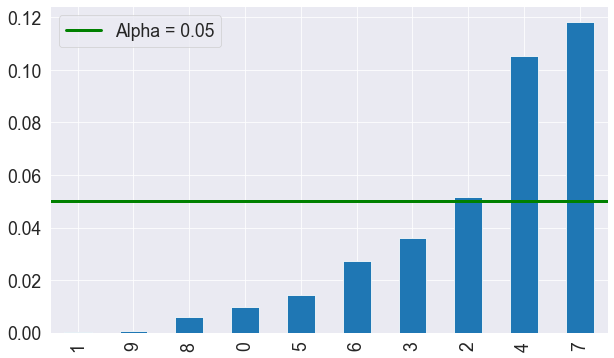

In [32]:
plt.rcParams['figure.figsize'] = (10, 6)
df.columns = np.arange(11)
pd.Series(score, index=df.columns[:-1]).sort_values(ascending=True).plot(kind='bar')
plt.axhline(y=0.05, color='g', label='Alpha = 0.05', linewidth=3)
plt.legend()  # Add this line to display the legend
plt.savefig('p_values_graph.png')  # Adjust the file name if needed
plt.show()


In [21]:
df = df[[1,9,8,0,5,6,3,10]]
df[10].unique()

array(['Satisfied', 'Neutral', 'Dissatisfied'], dtype=object)

In [22]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder

In [23]:
X = df.drop(columns=[10])
y = df[[10]]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
pipeline = LabelEncoder()

In [24]:
for col in x_train.columns:
    pipeline = LabelEncoder()
    pipeline.fit(x_train[col])
    x_train[col] = pipeline.transform(x_train[col])
    x_test[col] = pipeline.transform(x_test[col])

In [25]:
pipeline = LabelEncoder()
pipeline.fit(y_train)
y_train = pipeline.transform(y_train)
y_test = pipeline.transform(y_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [27]:
x_train

,1,9,8,0,5,6,3
13,1,4,2,1,1,0,1
24,0,4,0,1,1,0,2
3,0,1,3,0,2,0,0
17,0,1,2,1,1,0,2
38,1,3,2,0,0,2,1
8,2,4,1,0,2,2,2
80,2,1,3,0,2,0,0
6,2,4,2,1,2,3,2
66,2,2,2,1,2,0,1
36,2,2,2,1,2,1,2


In [28]:
y_train

array([2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1,
       0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2])

In [29]:
model.fit(x_train, y_train)

NameError: name 'model' is not defined

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'cm' is not defined

<Figure size 576x432 with 0 Axes>

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm

In [33]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=10)),
    ('gbdt',GradientBoostingClassifier())
]

In [34]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=svm.SVC(),
    cv=10
)


In [35]:
clf.fit(x_train, y_train)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=SVC())

In [36]:
y_pred = clf.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6730769230769231

In [38]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9200\3563971287.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


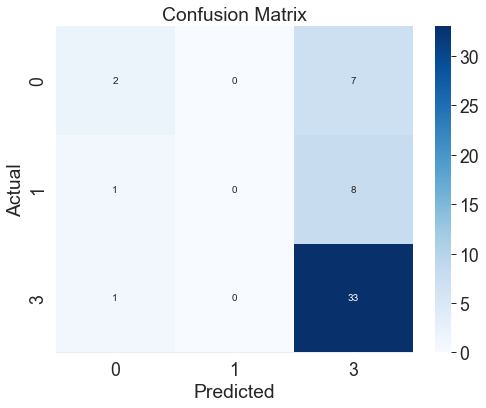

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1,3], yticklabels=[0, 1,3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('Confusion Matrix.png')
plt.show()